# Eighth Session of Stochastic Modelling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/EightSession.ipynb)

## A very fast recap on the Gillespie Algorithm

Let's suppose we have a CTMC $X_{t}$ with rate matrix $Q$ and initial state $X_{0}$. To simulate it is necessary to build the jump matrix $A$ which has components
$$a_{ii}=0$$
$$a_{ij}=-\frac{q_{ij}}{q_{ii}}$$
Note that $$\sum_{j=1}^{n}a_{ij}=1$$
With this we can write the Gillespie algoritm:


In [1]:

'''
PSEUDOCODE
def Gillespie():
    $t=0$
    $X=X_{0}$
    while:
        draw deltat from Exponential(Q[x])
        t=d+delta t
        draw x from Categorical(A[x])
        save (t,x)
'''

'\nPSEUDOCODE\ndef Gillespie():\n    $t=0$\n    $X=X_{0}$\n    while:\n        draw deltat from Exponential(Q[x])\n        t=d+delta t\n        draw x from Categorical(A[x])\n        save (t,x)\n'

### Exercise
- Using scipy.linalg.expm write an algorithm to compute the marginal probability of the CTMC at time t (not the conditional)
- Write the python code of the gillespie algorithm 
- Simulate the marginal probability and the gillespie algorithm for the CTMC associated to the matrix 
$$\begin{bmatrix} -1 & 1  \\ 
 2  & -2  \end{bmatrix}$$
 
 
### Solution

In [2]:


import numpy as np
import scipy
import matplotlib.pyplot as plt


def CTMCsteadystate_probability(Q,p0,t):
  l=[]
  for i in t:
    p=p0@scipy.linalg.expm(Q*i) 
    l.append(p)
  return np.array(l)


def CtmcSimulation(Q,x0,max_time):
  A=Q.copy()
  np.fill_diagonal(A,0)
  A=(A.T/(np.sum(A,axis=1))).T
  times=[]
  states=[]
  tot_time=0
  times.append(tot_time)
  x=x0
  states.append(x)
  while tot_time<max_time:
    t=scipy.stats.expon(scale=-1/Q[x0,x0]).rvs(size=1)[0]
    tot_time=tot_time+t
    times.append(tot_time)
    states.append(x)
    x=np.random.choice(len(A),p=A[x])
    times.append(tot_time)
    states.append(x)
  return times,states


In [3]:
A=np.array([[-1,1],[2,-2]])
p0=np.array([0.5,0.5])

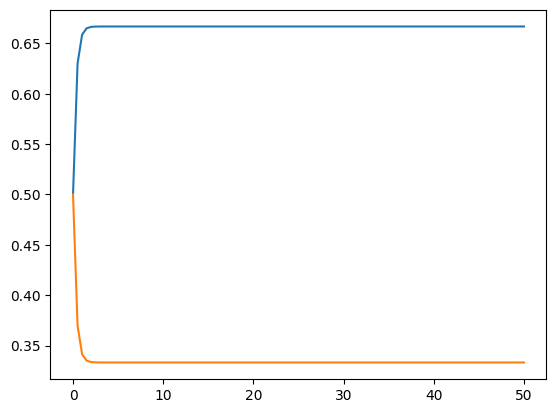

In [4]:
t=np.linspace(0,50,100)
p=CTMCsteadystate_probability(A,p0,t)
plt.plot(t,p)


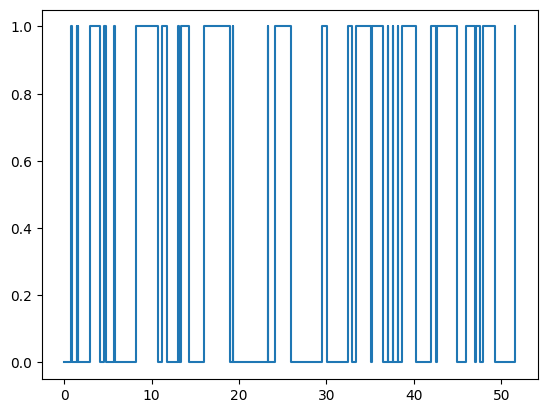

In [5]:
t,s=CtmcSimulation(A,0,50)
plt.plot(t,s)
